In [1]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, n_informative=1,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.63007982],
       [-1.06163445],
       [ 0.29634711],
       [ 1.40277112],
       [ 0.68968231],
       [-0.53662936],
       [-1.11947526],
       [ 1.06755846],
       [ 0.1178195 ],
       [ 1.54907163],
       [ 1.29561858],
       [-0.03107509],
       [ 0.56119218],
       [ 0.42105072],
       [-0.4864951 ],
       [ 0.08897764],
       [-0.18577532],
       [-0.17809318],
       [-0.23725045],
       [-0.88623967],
       [-0.47573349],
       [ 0.21734821],
       [-2.65331856],
       [ 0.72575222],
       [-0.38053642],
       [-0.48456513],
       [ 1.57463407],
       [-1.30554851],
       [-0.17241977],
       [ 0.73683739],
       [-1.23234621],
       [ 0.31540267],
       [ 1.74945474],
       [ 0.09183837],
       [-0.30957664],
       [-1.18575527],
       [-0.68344663],
       [-0.31963136],
       [-0.00828463],
       [-0.64257539],
       [ 1.0956297 ],
       [ 0.06367166],
       [-0.57395456],
       [ 0.07349324],
       [ 0.73227135],
       [-1

array([  43.6543408 ,  -72.68235021,   21.19644643,  107.58765071,
         69.62063217,  -32.57566222, -101.61213107,   87.44514699,
         17.69898683,  131.00190463,   97.97802247,    2.70819092,
         52.42715419,   27.74476129,  -31.82947365,    1.58209228,
         -9.72570848,    4.57391214,  -33.24586607,  -74.34292886,
        -22.6419015 ,   15.84607909, -202.79645668,   49.05026172,
        -34.9916168 ,  -33.95608308,  121.78273292, -123.72382672,
         -1.90918067,   64.06753923,  -91.73785524,    9.55252237,
        148.12427806,   22.21183346,  -16.35144507, -113.95075954,
        -47.70966758,  -22.69082132,   -1.79022499,  -58.17761844,
         91.76970817,  -12.7798199 ,  -38.1435921 ,   17.48650737,
         40.52468632, -107.65815151, -134.20798669, -127.22516755,
        -34.31360406,  -10.90920383])

In [2]:
X.shape

(50, 1)

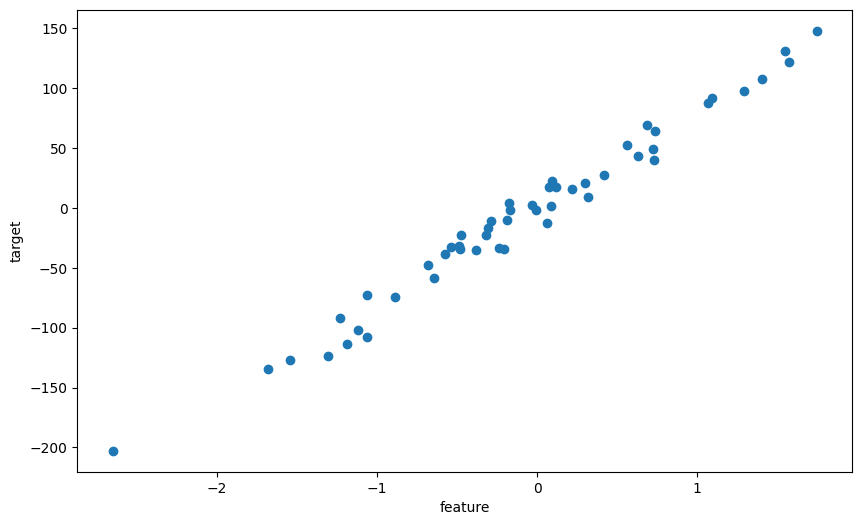

In [2]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [4]:
model.fit(X, y)

LinearRegression()

In [5]:
model.coef_, model.intercept_

(array([80.41862354]), 0.1817188754210024)

In [6]:
model_a = model.coef_[0]
model_b = model.intercept_

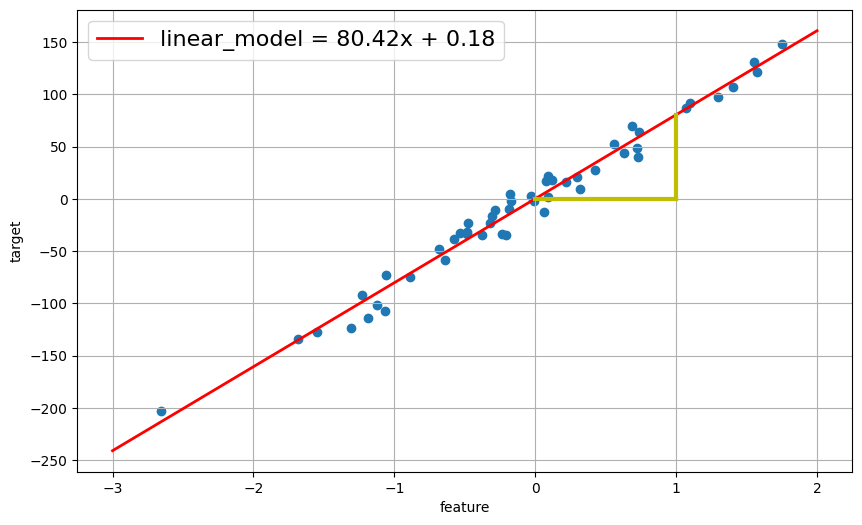

In [7]:
import numpy as np
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
model_y_sk = model_a * x + model_b

plt.plot(x, model_y_sk, linewidth=2, c='r', label=f'linear_model = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(X, y)
plt.plot([0, 1], [model_b, model_b], 'y', linewidth=3)
plt.plot([1, 1], [model_b, model_b+model_a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

In [8]:
model.predict(X[:1])

array([50.85187092])

In [9]:
model_a * X[:1] + model_b

array([[50.85187092]])

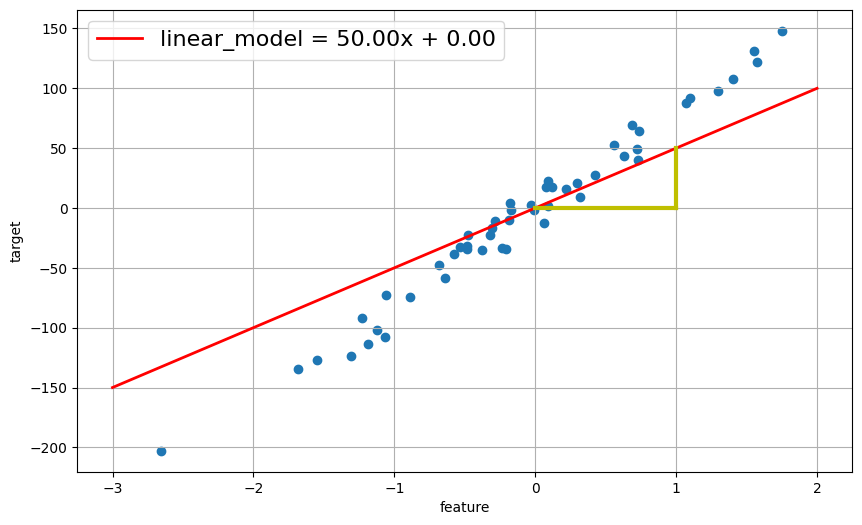

In [10]:
fig = plt.figure(figsize=(10, 6))

x = np.arange(-3, 3)
a, b = 50, 0
model_y = a * x + b

plt.plot(x, model_y, linewidth=2, c='r', label=f'linear_model = {a:.2f}x + {b:.2f}')
plt.scatter(X, y)
plt.plot([0, 1], [b, b], 'y', linewidth=3)
plt.plot([1, 1], [b, b+a], 'y', linewidth=3)
plt.grid()
plt.xlabel('feature')
plt.ylabel('target')
plt.legend(prop={'size': 16})
plt.show()

In [11]:
import pandas as pd

df = pd.DataFrame({
    'X': X[:,0],
    'y': y,
    'pred_good_model': model_a * X[:,0] + model_b,
    'pred_bad_model': a * X[:,0] + b
})


df.head()

,X,y,pred_good_model,pred_bad_model
0,0.630080,43.654341,50.851871,31.503991
1,-1.061634,-72.682350,-85.193462,-53.081722
2,0.296347,21.196446,24.013545,14.817355
3,1.402771,107.587651,112.990641,70.138556
4,0.689682,69.620632,55.645021,34.484116


In [12]:
df['residual_good'] = df['pred_good_model'] - df['y']
df['residual_bad'] = df['pred_bad_model'] - df['y']
df.head()

,X,y,pred_good_model,pred_bad_model,residual_good,residual_bad
0,0.630080,43.654341,50.851871,31.503991,7.197530,-12.150350
1,-1.061634,-72.682350,-85.193462,-53.081722,-12.511112,19.600628
2,0.296347,21.196446,24.013545,14.817355,2.817099,-6.379091
3,1.402771,107.587651,112.990641,70.138556,5.402991,-37.449095
4,0.689682,69.620632,55.645021,34.484116,-13.975611,-35.136517


In [13]:
np.mean(df['residual_good'] ** 2)

111.93097544862604

In [14]:
np.mean(df['residual_bad'] ** 2)

873.1554374932329

In [15]:
X, y = make_regression(n_samples=50, n_features=4, n_informative=4,
                       noise=10, random_state=11)

display(X, y)

array([[ 0.85866717, -1.26407368,  1.11487028,  0.43477699],
       [ 1.29127473, -0.96420485,  0.07175977,  0.2716063 ],
       [ 1.06755846, -1.06163445,  0.21734821,  0.1178195 ],
       [ 0.07101978,  0.92157523, -0.37682984,  0.91998254],
       [ 0.27540666,  0.18632534, -1.13980565,  0.14180489],
       [ 0.29634711,  1.40277112, -1.54686257,  1.29561858],
       [-1.68728061, -1.69734212, -0.41145394, -0.04527514],
       [ 0.5936862 ,  0.37050633,  1.34537807,  1.01594215],
       [-0.86335252, -0.13054147, -0.52308763, -0.25127692],
       [ 0.65402488,  1.79948007,  1.5466061 ,  1.60987398],
       [ 1.0956297 , -0.30957664,  0.72575222,  1.54907163],
       [-0.39117313,  1.53422235, -0.16419295,  0.36036665],
       [ 0.68731235, -1.82300958,  0.8791138 ,  1.84636487],
       [-1.0616544 , -0.68448467, -0.47621448,  0.83031043],
       [-1.1288944 ,  0.01699688, -0.42442882, -0.1329099 ],
       [ 0.51002802,  0.33871394, -1.17212003, -1.04596765],
       [ 1.08771086,  0.

array([  43.59907368,   33.3226129 ,   12.92842886,   56.76209111,
        -28.24075472,   64.36182392, -220.93063391,  134.81614163,
       -111.85450024,  244.9327123 ,  106.23869476,   83.15972598,
         22.1607008 ,  -87.67552386,  -94.67026039,  -29.62752165,
        119.90179833,  -16.36526242,  -71.2734975 ,  -33.77825083,
         24.31113443,  102.14682115,    1.12585934,  -48.81175726,
        -58.59186113, -111.47215424,  -12.5784088 ,  -14.21337533,
         64.61172215,   10.81251385,   99.11401244,  -75.98950916,
        -52.77978396, -112.95415032,    7.45744433,   33.69756994,
        -24.66640928,  -35.64805852,  -76.68888106, -129.08694753,
         59.65011241, -158.52958483,  -61.09970272,  -97.83194751,
         36.42924987,  -49.96145024,  104.10943674,  -80.90767725,
         99.76081282,  152.70106779])

In [16]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [17]:
model.coef_, model.intercept_

(array([59.51225616, 57.72556421, 44.70715115, 24.87193091]),
 -1.6392969526147114)

In [18]:
model.predict(X[:1])

array([37.14897504])

In [19]:
np.sum(model.coef_ * X[0]) + model.intercept_

37.1489750426928

In [20]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_fit'] = model.predict(X)
df['pred_dot'] = X.dot(model.coef_) + model.intercept_

df.head()

,0,1,2,3,y,pred_fit,pred_dot
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992


In [21]:
df['residual'] = df['pred_fit'] - df['y']
df.head()

,0,1,2,3,y,pred_fit,pred_dot,residual
0,0.858667,-1.264074,1.114870,0.434777,43.599074,37.148975,37.148975,-6.450099
1,1.291275,-0.964205,0.071760,0.271606,33.322613,29.511654,29.511654,-3.810959
2,1.067558,-1.061634,0.217348,0.117820,12.928429,13.257486,13.257486,0.329057
3,0.071020,0.921575,-0.376830,0.919983,56.762091,61.820454,61.820454,5.058363
4,0.275407,0.186325,-1.139806,0.141805,-28.240755,-21.923992,-21.923992,6.316763


In [22]:
np.mean(df['residual'] ** 2)

92.64429127220507